In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [79]:
comp = pd.read_csv("Company_Data.csv")
print(comp.head(10))
print(comp.shape)

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   
5  10.81        124     113           13         501     72       Bad   78   
6   6.63        115     105            0          45    108    Medium   71   
7  11.85        136      81           15         425    120      Good   67   
8   6.54        132     110            0         108    124    Medium   76   
9   4.69        132     113            0         131    124    Medium   76   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         1

In [80]:
comp.T

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
Sales,9.5,11.22,10.06,7.4,4.15,10.81,6.63,11.85,6.54,4.69,...,5.47,6.1,4.53,5.57,5.35,12.57,6.14,7.41,5.94,9.71
CompPrice,138,111,113,117,141,124,115,136,132,132,...,108,153,129,109,130,138,139,162,100,134
Income,73,48,35,100,64,113,105,81,110,113,...,75,63,42,51,58,108,23,26,79,37
Advertising,11,16,10,4,3,13,0,15,0,0,...,9,0,13,10,19,17,3,12,7,0
Population,276,260,269,466,340,501,45,425,108,131,...,61,49,315,26,366,203,37,368,284,27
Price,120,83,80,97,128,72,108,120,124,124,...,111,124,130,120,139,128,120,159,95,120
ShelveLoc,Bad,Good,Medium,Medium,Bad,Bad,Medium,Good,Medium,Medium,...,Medium,Bad,Bad,Medium,Bad,Good,Medium,Medium,Bad,Good
Age,42,65,59,55,38,78,71,67,76,76,...,67,56,34,30,33,33,55,40,50,49
Education,17,10,12,14,13,16,15,10,10,17,...,12,16,13,17,16,14,11,18,12,16
Urban,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,...,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes


In [81]:
comp.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [82]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


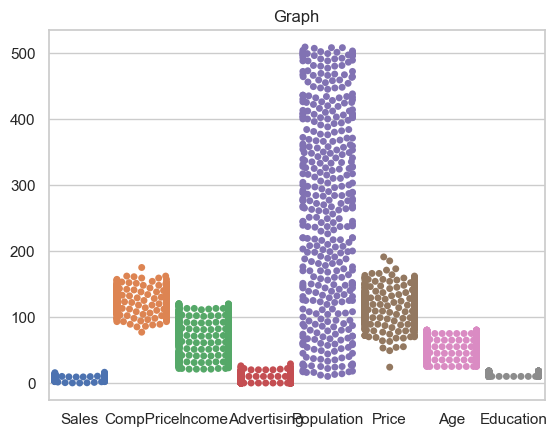

In [83]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.swarmplot(data=comp)
plt.title('Graph')
plt.show()

<Axes: >

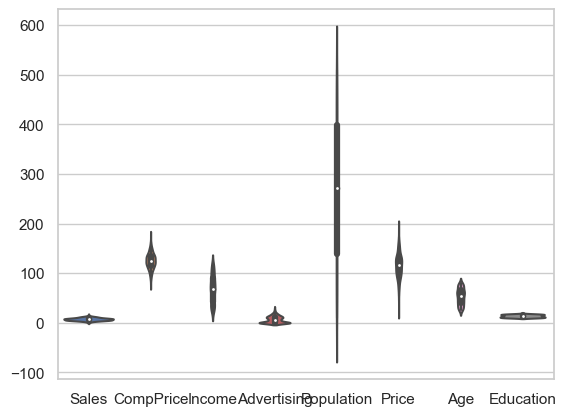

In [84]:
 sns.violinplot(data=comp)

<Axes: >

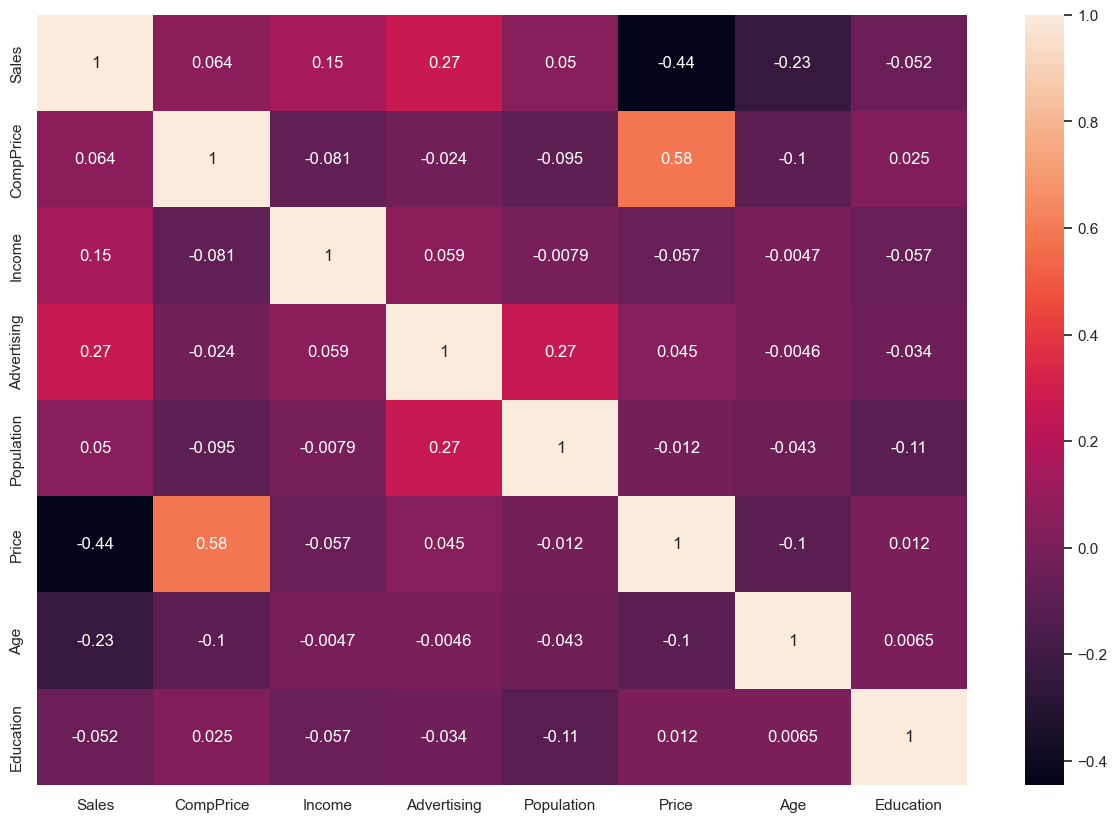

In [85]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(comp.corr(),annot=True)

In [86]:
numerical_feature = comp.describe(include=["int64", "float64"]).columns
print(list(numerical_feature))

['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


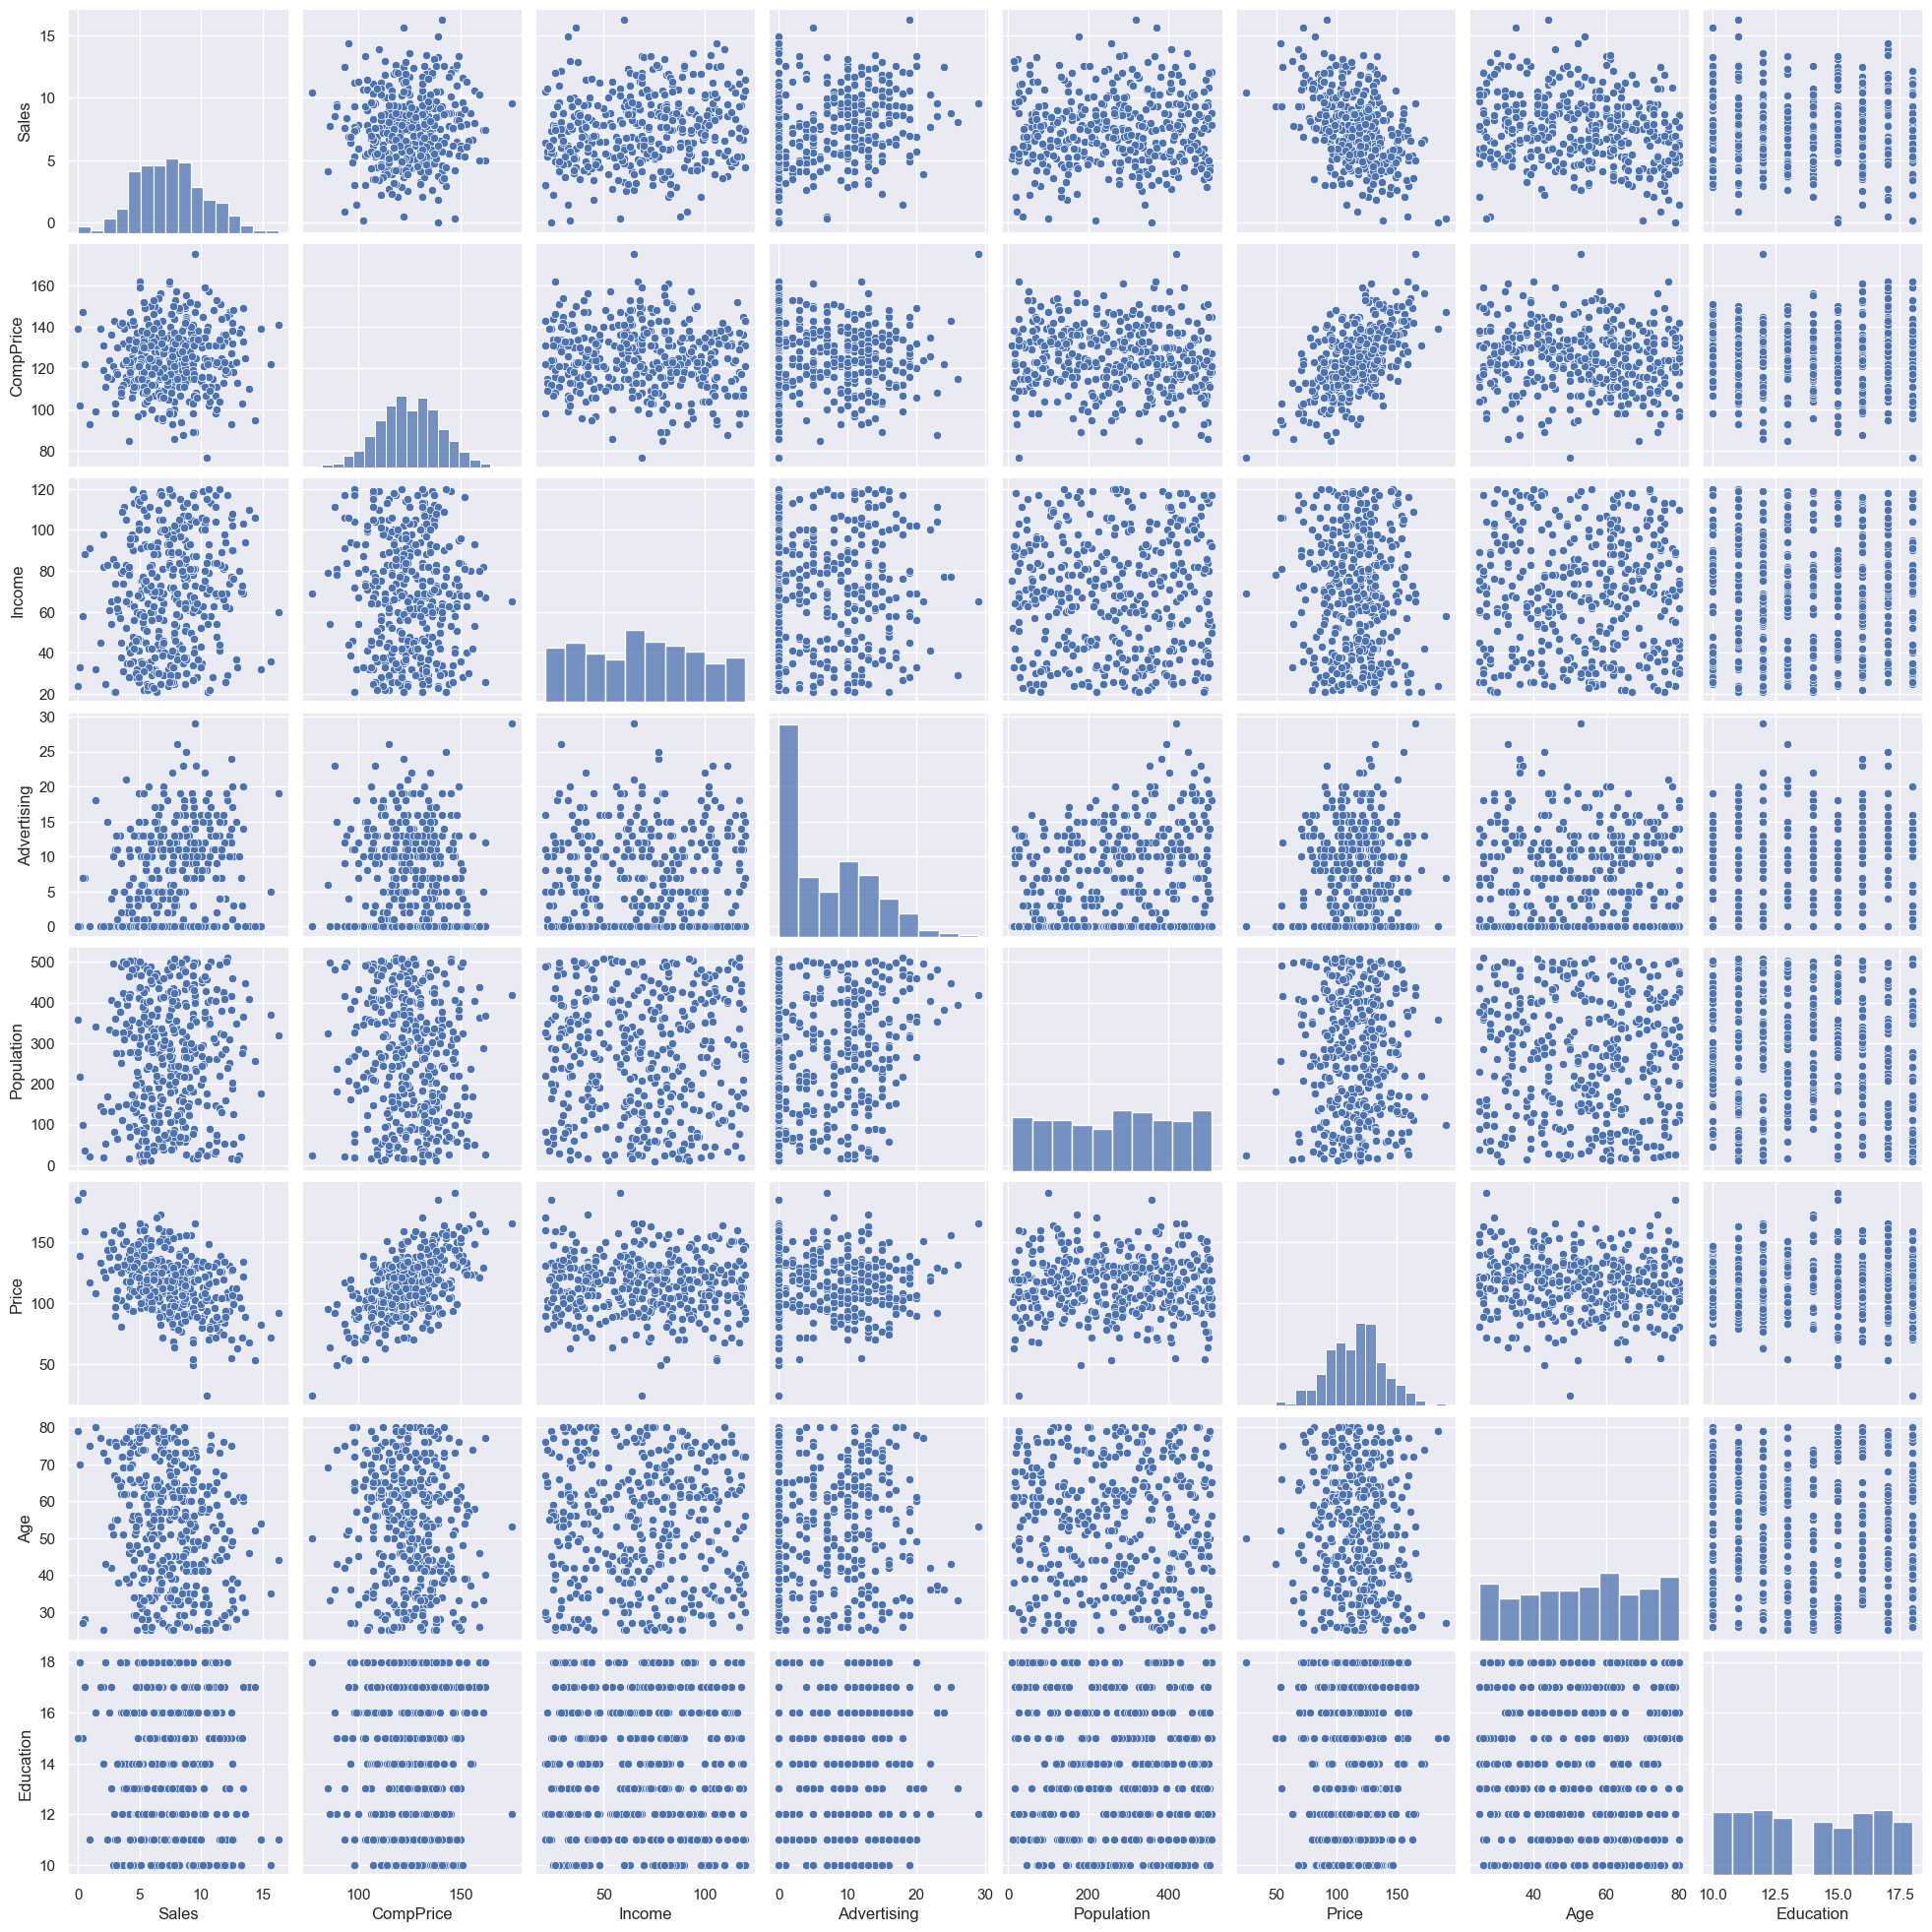

In [87]:
sns.set_style('darkgrid')
sns.pairplot(comp[numerical_feature])
plt.show()

In [88]:
categorical_feature = comp.describe(include=["object"]).columns

print(list(categorical_feature))

['ShelveLoc', 'Urban', 'US']


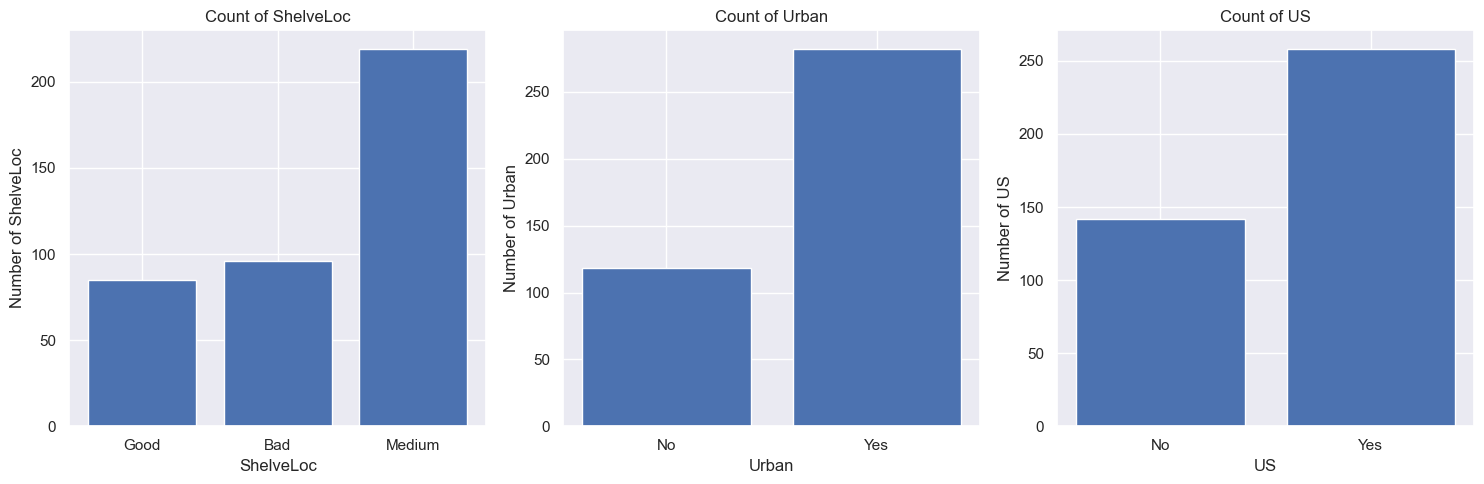

In [89]:
plt.figure(figsize=(15, 5))
for idx, column in enumerate(categorical_feature):
    df = comp.copy()
    unique = df[column].value_counts(ascending=True);
 
    plt.subplot(1, 3, idx+1)    
    plt.title("Count of "+ column)
    plt.bar(unique.index, unique.values);
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
    
plt.tight_layout()
plt.show() 

In [90]:
def distplot(param):
    plt.figure(figsize=(20,15))
    sns.distplot(comp[param], color = "magenta", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.show()

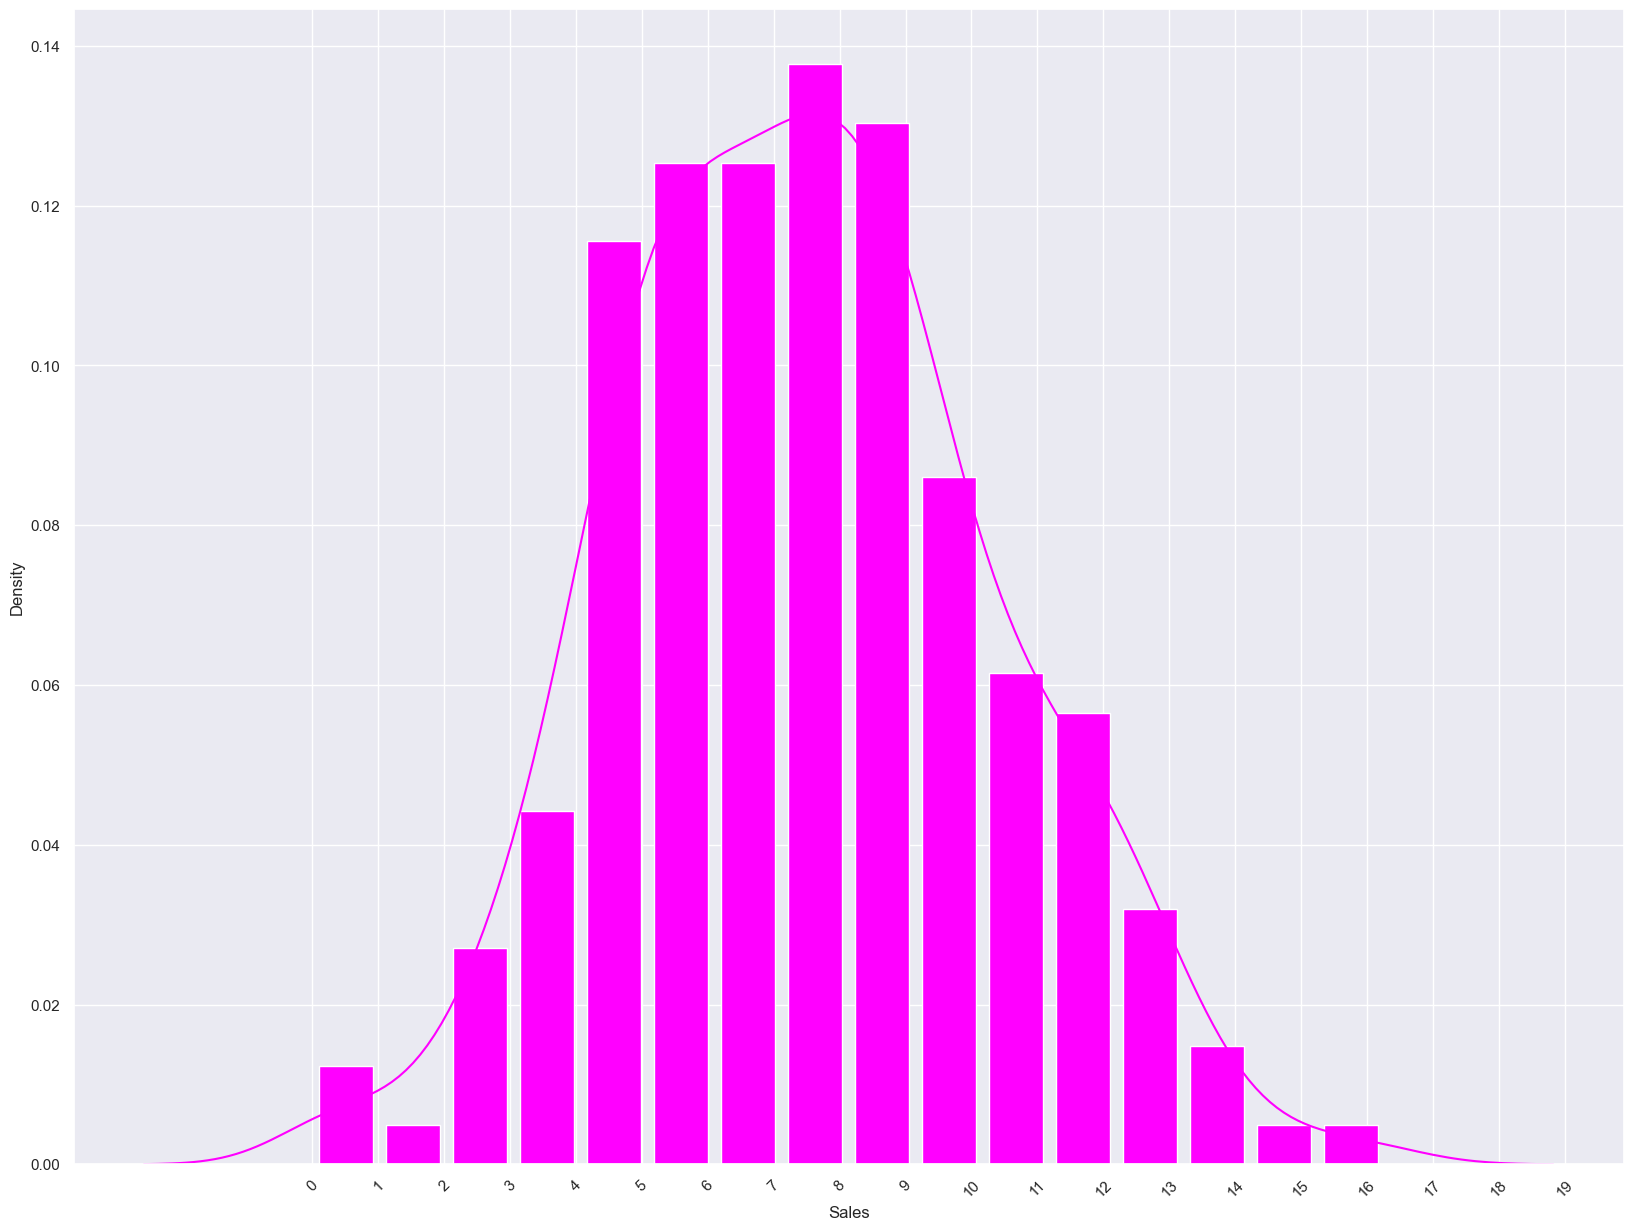

In [91]:
distplot("Sales")

Text(0.5, 1.0, 'Correlation with Sales')

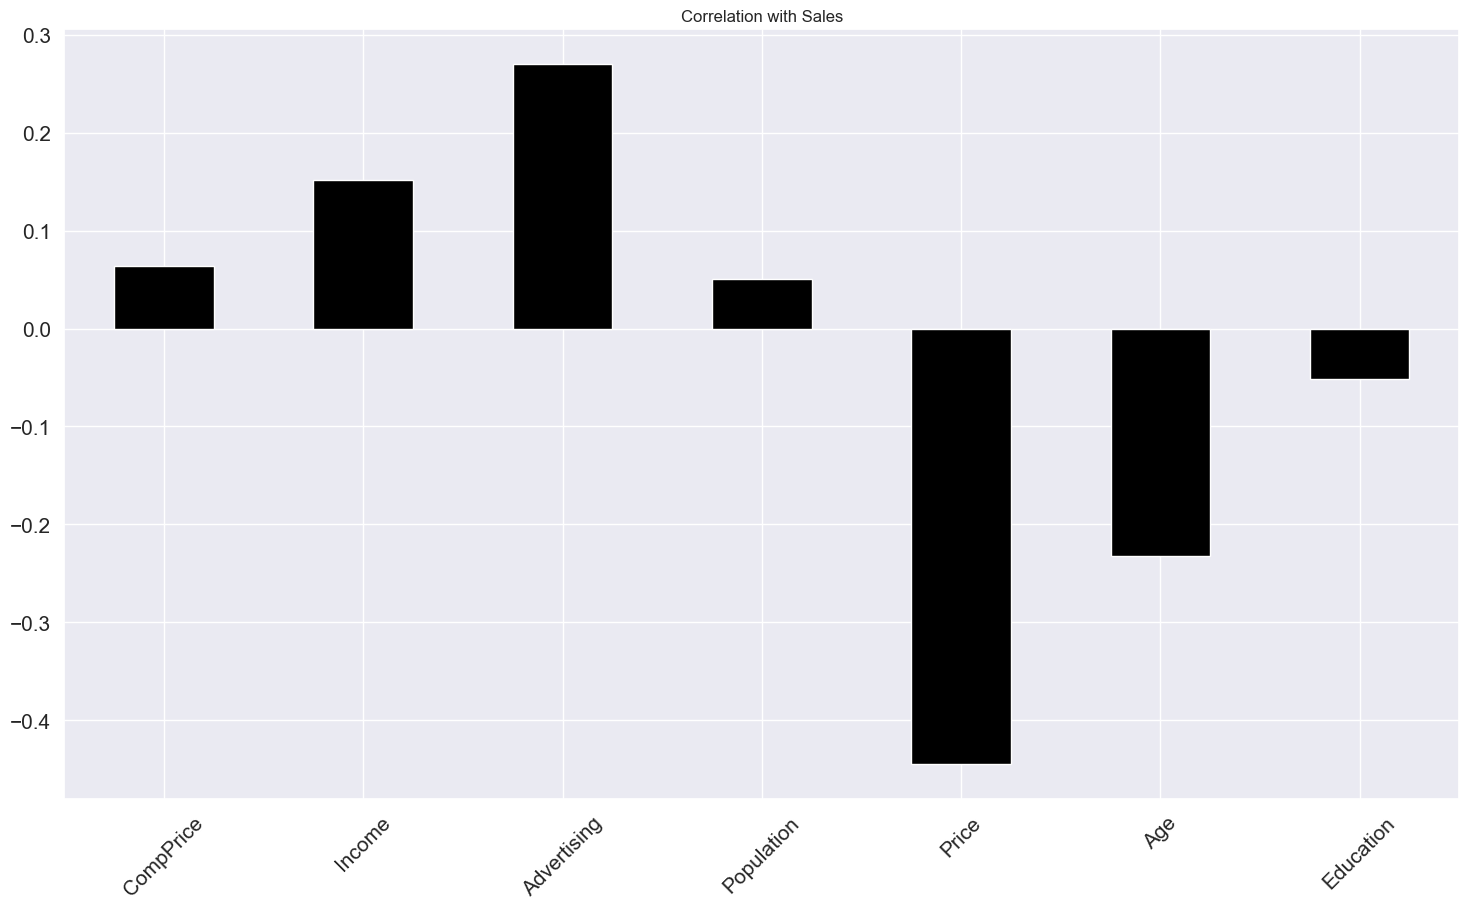

In [92]:
comp_1 = comp.iloc[:,1:]
correlations = comp_1.corrwith(comp.Sales)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'black',
        rot = 45, grid = True)
plt.title('Correlation with Sales')

# Changing the categorical variables into dummies.

In [93]:
comp_1 = pd.get_dummies(comp)

# Converting the Target variable i.e. Sales into Categorical

In [94]:
comp_1['Category'] = pd.cut(comp_1['Sales'], 
                        bins=[0,10, np.inf], 
                        labels=['Average','High'],
                        include_lowest=True)
comp_1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Category
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,Average
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,High
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Average
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,High
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,Average
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,Average
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,Average


In [95]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
type_ = ["Medium", "Low", "High"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=comp['Sales'].value_counts(), name="Sales"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sales Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sales', x=0.5, y=0.5, font_size=20, showarrow=True)])
fig.show()

# Random Forest

In [99]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [102]:
array = comp_1.values
X = array[:,1:15]
Y = array[:,15]

In [103]:
num_trees = 100
max_features = 4
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
model = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean()*100)

87.25


# Ensemble techniques

# 1. Bagging

In [104]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [105]:
seed = 10
cart = DecisionTreeClassifier()
num_trees = 100

In [106]:
model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results1 = cross_val_score(model1, X, Y, cv=kfold)
print(results1.mean()*100)

86.75


# 2. Boosting

# AdaBoost Classification

In [107]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results2 = cross_val_score(model2, X, Y, cv=kfold)
print(results2.mean()*100)

89.75


# 3. Stacking

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Iteration = 1

In [110]:
estimators = []
model3 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model3))

model4 = DecisionTreeClassifier()
estimators.append(('cart', model4))

model5 = SVC()
estimators.append(('svm', model5))

model6 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('bagging', model6))

model7 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model7))

# create the ensemble modelIter
ensemble = VotingClassifier(estimators)
results3 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results3.mean()*100)

89.75


# Iteration = 2

In [111]:
estimators = []
model8 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model8))

model9 = DecisionTreeClassifier()
estimators.append(('cart', model9))

model10 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('bagging', model10))

model11 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model11))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results4 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results4.mean()*100)

88.75


# Iteration = 3

In [112]:
estimators = []
model12 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model12))

model13 = DecisionTreeClassifier()
estimators.append(('cart', model13))

model14 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model14))

# create the ensemble modSel
ensemble = VotingClassifier(estimators)
results5 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results5.mean()*100)

90.0


# Iteration = 4

In [113]:
estimators = []
model15 = DecisionTreeClassifier()
estimators.append(('cart', model15))

model16 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model16))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results6 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results6.mean()*100)

88.25


# Iteration = 5

In [114]:
estimators = []
model17 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model17))

model18 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model18))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results6 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results6.mean()*100)

91.5
